# Datenanalyse 
Der kombinierte Datensatz fertig.csv soll analysiert werden 
Ziel ist es zu überprüfen ob sich spannende Informationen ergeben


Imports and other stuff

In [2]:

import re
import numpy as np
import pandas as pd

file_path1 = "fertig.csv"
from pathlib import Path
import matplotlib.pyplot as plt
# Pfad zum Wurzelordner mit allen Bildern
ROOT_DIR = Path("/Users/davidassmann/Desktop/GuI/Objektbilder")   # <- anpassen!

# Dateiendungen, die gezählt werden sollen
IMG_EXTS = {".jpg", ".jpeg", ".png", ".tif", ".tiff"}

Creating the DataFrame

In [3]:

df = pd.read_csv(file_path1, encoding="latin1", sep=",")

In [4]:
print(df)
print(df.shape)       # Zeilen, Spalten
print(df.columns)     # alle Spaltennamen


      0   1   2   3              4  \
0   NaN NaN NaN NaN  1-2024-0061 0   
1   NaN NaN NaN NaN  1-2024-0062 0   
2   NaN NaN NaN NaN  1-2024-0063 0   
3   NaN NaN NaN NaN  1-2024-0064 0   
4   NaN NaN NaN NaN  1-2024-0065 0   
..   ..  ..  ..  ..            ...   
96  NaN NaN NaN NaN  1-2025-0523 0   
97  NaN NaN NaN NaN  1-2025-0524 0   
98  NaN NaN NaN NaN  1-2025-0603 0   
99  NaN NaN NaN NaN  1-2025-0759 0   
100 NaN NaN NaN NaN  1-2025-0767 0   

                                                     5   6   7   8   9  ...  \
0                              RFT Fernmeldewerk (VEB) NaN NaN NaN NaN  ...   
1                              RFT Fernmeldewerk (VEB) NaN NaN NaN NaN  ...   
2                       Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ...   
3                       Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ...   
4                       Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ...   
..                                                 ...  ..  ..  ..  .

In [5]:
# Spalte 4 (E) bereinigen und im DataFrame überschreiben
df.iloc[:, 4] = (
    df.iloc[:, 4]
    .astype(str)              # sicherstellen, dass es Strings sind
    .str.strip()              # Leerzeichen vorne/hinten weg
    .str.replace(r"\s+0+$", "", regex=True)   # " 0" am Ende entfernen
)

# Kontrolle
print(df.head(10))


    0   1   2   3            4  \
0 NaN NaN NaN NaN  1-2024-0061   
1 NaN NaN NaN NaN  1-2024-0062   
2 NaN NaN NaN NaN  1-2024-0063   
3 NaN NaN NaN NaN  1-2024-0064   
4 NaN NaN NaN NaN  1-2024-0065   
5 NaN NaN NaN NaN  1-2024-0066   
6 NaN NaN NaN NaN  1-2024-0070   
7 NaN NaN NaN NaN  1-2024-0071   
8 NaN NaN NaN NaN  1-2024-0072   
9 NaN NaN NaN NaN  1-2024-0073   

                                                   5   6   7   8   9  ...  74  \
0                            RFT Fernmeldewerk (VEB) NaN NaN NaN NaN  ... NaN   
1                            RFT Fernmeldewerk (VEB) NaN NaN NaN NaN  ... NaN   
2                     Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ... NaN   
3                     Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ... NaN   
4                     Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ... NaN   
5                     Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ... NaN   
6  Philips - Koninklijke Philips N. V.\nMuharrem ... NaN N

In [6]:
# Hilfsfunktion: wie viele Bilder gibt es zu einer Objektnummer?
def count_images_for_number(number: str, root: Path) -> int:
    number = str(number).strip()
    if not number or number.lower() == "nan":
        return 0

    hits = []
    for p in root.rglob("*"):
        if p.is_file() and p.suffix.lower() in IMG_EXTS:
            if p.stem.startswith(number):  # stem = Dateiname ohne Endung
                hits.append(p)
    return len(hits)


# Neue Spalte "image_count" anlegen (Spalte 4 = E)
df["image_count"] = df.iloc[:, 4].apply(lambda num: count_images_for_number(num, ROOT_DIR))

# Kontrolle
print(df[["image_count"]].head())

   image_count
0            7
1            6
2            7
3            6
4            6


In [7]:
print(df)

      0   1   2   3            4  \
0   NaN NaN NaN NaN  1-2024-0061   
1   NaN NaN NaN NaN  1-2024-0062   
2   NaN NaN NaN NaN  1-2024-0063   
3   NaN NaN NaN NaN  1-2024-0064   
4   NaN NaN NaN NaN  1-2024-0065   
..   ..  ..  ..  ..          ...   
96  NaN NaN NaN NaN  1-2025-0523   
97  NaN NaN NaN NaN  1-2025-0524   
98  NaN NaN NaN NaN  1-2025-0603   
99  NaN NaN NaN NaN  1-2025-0759   
100 NaN NaN NaN NaN  1-2025-0767   

                                                     5   6   7   8   9  ...  \
0                              RFT Fernmeldewerk (VEB) NaN NaN NaN NaN  ...   
1                              RFT Fernmeldewerk (VEB) NaN NaN NaN NaN  ...   
2                       Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ...   
3                       Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ...   
4                       Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ...   
..                                                 ...  ..  ..  ..  ..  ...   
96            

Minimale Anzahl Bilder: 0
Maximale Anzahl Bilder: 13
Durchschnittliche Anzahl Bilder: 4.267326732673268
Median: 4.0


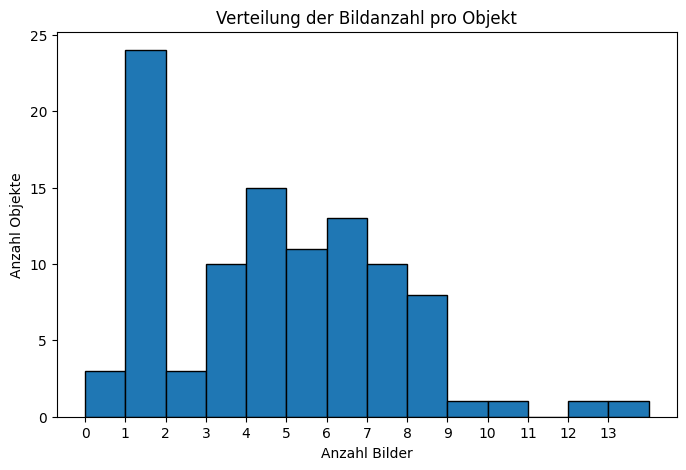

In [8]:
# Basisstatistiken für die Spalte 'image_count'
print("Minimale Anzahl Bilder:", df["image_count"].min())
print("Maximale Anzahl Bilder:", df["image_count"].max())
print("Durchschnittliche Anzahl Bilder:", df["image_count"].mean())
print("Median:", df["image_count"].median())

# Histogramm
plt.figure(figsize=(8,5))
plt.hist(df["image_count"], bins=range(0, df["image_count"].max()+2), edgecolor="black")
plt.title("Verteilung der Bildanzahl pro Objekt")
plt.xlabel("Anzahl Bilder")
plt.ylabel("Anzahl Objekte")
plt.xticks(range(0, df["image_count"].max()+1))
plt.show()

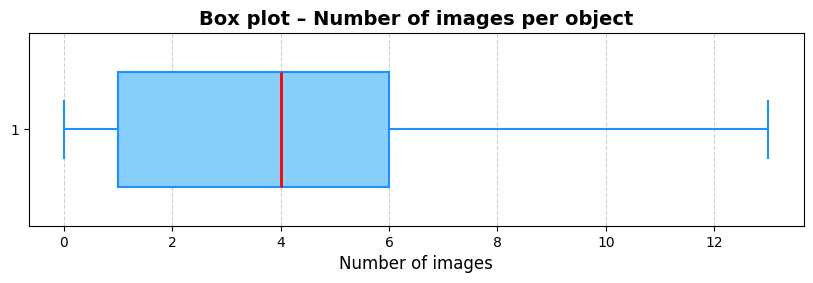

In [9]:
plt.figure(figsize=(10,2.5))

# Boxplot mit schöneren Farben & breiterer Box
plt.boxplot(
    df["image_count"],
    vert=False,                 # horizontal
    patch_artist=True,          # Box mit Farbe füllen
    widths=0.6,                 # Boxbreite
    boxprops=dict(facecolor="#87CEFA", color="#1E90FF", linewidth=1.5),  # hellblau, blauer Rand
    medianprops=dict(color="red", linewidth=2),                           # roter Medianstrich
    whiskerprops=dict(color="#1E90FF", linewidth=1.5),                    # Whisker
    capprops=dict(color="#1E90FF", linewidth=1.5),                        # Endkappen
    flierprops=dict(marker="o", markerfacecolor="orange", markersize=6, alpha=0.7) # Ausreißer
)

plt.title("Box plot – Number of images per object", fontsize=14, fontweight="bold")
plt.xlabel("Number of images", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)   # dezentes Raster

plt.show()

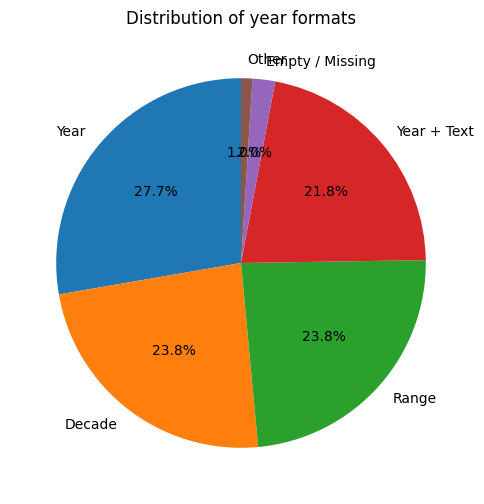

In [13]:
def categorize_year_text(text):
    if pd.isna(text) or str(text).strip() == "":
        return "Empty / Missing"
    s = str(text)

    # Range: 2 Jahre wie 1950-1960 oder 1950/1960
    m_span = re.findall(r"(1[5-9]\d{2}|20[0-2]\d)", s)
    if len(m_span) == 2:
        return "Range"

    # Decade: "1950er Jahre"
    if re.search(r"(1[5-9]\d{2}|20[0-2]\d)\s*er", s):
        return "Decade"

    # Single Year
    if re.search(r"^(1[5-9]\d{2}|20[0-2]\d)$", s.strip()):
        return "Year"

    # Mixed cases: Zahl + Text
    if re.search(r"(1[5-9]\d{2}|20[0-2]\d)", s):
        return "Year + Text"

    return "Other"

# Kategorisieren
df["jahr_category"] = df["82"].apply(categorize_year_text)

# Zählen
counts = df["jahr_category"].value_counts()

# Tortendiagramm
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of year formats")
plt.show()


In [11]:


def extract_single_year(text):
    if pd.isna(text):
        return np.nan
    s = str(text)

    # Spanne: "1950-1960" oder "1950/1960" oder mit Gedankenstrich
    m_span = re.findall(r"(1[5-9]\d{2}|20[0-2]\d)", s)
    if len(m_span) == 2:
        y1, y2 = int(m_span[0]), int(m_span[1])
        return int((y1 + y2) / 2)  # Mittelwert

    # Jahrzehnt: "1950er Jahre"
    m_dec = re.search(r"(1[5-9]\d{2}|20[0-2]\d)\s*er", s)
    if m_dec:
        y = int(m_dec.group(1))
        return y  # oder (y+5), wenn du lieber den Mittelpunkt willst

    # Einzelnes Jahr
    m_year = re.search(r"(1[5-9]\d{2}|20[0-2]\d)", s)
    if m_year:
        return int(m_year.group(1))

    return np.nan

# Neue Spalte mit bereinigtem Jahr
df["jahr_clean"] = df["82"].apply(extract_single_year)

# Kontrolle
print(df[["82","jahr_clean"]].head(20))


                                82  jahr_clean
0   Herstellungsjahr, 1950er Jahre      1950.0
1   Herstellungsjahr, 1950er Jahre      1950.0
2                     1930er Jahre      1930.0
3                     1960er Jahre      1960.0
4                     1960er Jahre      1960.0
5                     1960er Jahre      1960.0
6                             1960      1960.0
7           Herstellungsjahr, 1973      1973.0
8           Herstellungsjahr, 1976      1976.0
9           Herstellungsjahr, 1986      1986.0
10          Herstellungsjahr, 1990      1990.0
11          Herstellungsjahr, 1991      1991.0
12          Herstellungsjahr, 1989      1989.0
13                    1960er Jahre      1960.0
14                         um 1998      1998.0
15  Herstellungsjahr, 1960er Jahre      1960.0
16                    1960er Jahre      1960.0
17                    1960er Jahre      1960.0
18                    1960er Jahre      1960.0
19                    1960er Jahre      1960.0


Min: 1913.0
Max: 2023.0
Durchschnitt: 1969.84
Median: 1965.0


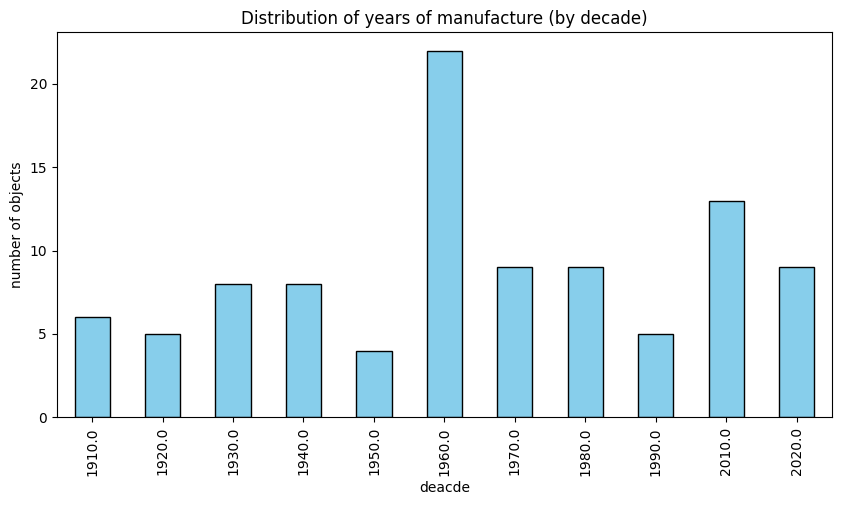

In [12]:
print("Min:", df["jahr_clean"].min())
print("Max:", df["jahr_clean"].max())
print("Durchschnitt:", round(df["jahr_clean"].mean(),2))
print("Median:", df["jahr_clean"].median())

plt.figure(figsize=(10,5))
(df["jahr_clean"] // 10 * 10).value_counts().sort_index().plot(
    kind="bar", color="skyblue", edgecolor="black"
)
plt.title("Distribution of years of manufacture (by decade)")
plt.xlabel("deacde")
plt.ylabel("number of objects")
plt.show()